In [2]:
# %matplotlib inline
import pandas as pd #Pandas para usar dataframes
import matplotlib.pyplot as plt #Para graficar
import matplotlib.cm as cm #Para graficar el silhouette
import seaborn as sns #Para graficar
import numpy as np #Para realizar operaciones númericas con matrices y arrays
from sklearn import datasets #sklearn es LA biblioteca de machine learning de python
from sklearn.cluster import KMeans, DBSCAN #Para usar kmeans
from sklearn.preprocessing import StandardScaler #Para estandarizar nuestros datos
from sklearn.metrics import silhouette_samples, silhouette_score #Para el coeficiente de silhouette
from sklearn.cluster import AgglomerativeClustering #Para clustering jerárquico
from sklearn.metrics import pairwise_distances #Para las distancias a pares
from scipy.cluster.hierarchy import dendrogram, cophenet, linkage #Para graficar los dendrogramas y calcular el coeficiente cofenetico
from scipy.cluster import hierarchy #Para graficar los dendrogramas
from scipy.spatial.distance import pdist #Para calcular la distancia con el coeficiente cofenetico


''' 
Ejercicios de complemento de la teoría: KMeans - Práctico
Paso 1: cargar los datos: 

stock_data = pd.read_csv("dataset_clustering_teorico.csv")
stock_data.head()

Paso 1 Inspeccioná el DataFrame y caracterizalo
Paso 2 Normaliza los datos y guardálos en una variable llamada stock_data_normalizado
Paso 3 Aplicá el método k-means usando k=14
Paso 4 Evaluá tus resultados
'''

In [3]:
stock_data = pd.read_csv("dataset_clustering_teorico.csv")
stock_data.head()

,Unnamed: 0,2010-01-04,2010-01-05,2010-01-06,2010-01-07,2010-01-08,2010-01-11,2010-01-12,2010-01-13,2010-01-14,...,2013-10-16,2013-10-17,2013-10-18,2013-10-21,2013-10-22,2013-10-23,2013-10-24,2013-10-25,2013-10-28,2013-10-29
0,Apple,0.580000,-0.220005,-3.409998,-1.170000,1.680011,-2.689994,-1.469994,2.779997,-0.680003,...,0.320008,4.519997,2.899987,9.590019,-6.540016,5.959976,6.910011,-5.359962,0.840019,-19.589981
1,AIG,-0.640002,-0.650000,-0.210001,-0.420000,0.710001,-0.200001,-1.130001,0.069999,-0.119999,...,0.919998,0.709999,0.119999,-0.480000,0.010002,-0.279998,-0.190003,-0.040001,-0.400002,0.660000
2,Amazon,-2.350006,1.260009,-2.350006,-2.009995,2.960006,-2.309997,-1.640007,1.209999,-1.790001,...,2.109985,3.699982,9.570008,-3.450013,4.820008,-4.079986,2.579986,4.790009,-1.760009,3.740021
3,American express,0.109997,0.000000,0.260002,0.720002,0.190003,-0.270001,0.750000,0.300004,0.639999,...,0.680001,2.290001,0.409996,-0.069999,0.100006,0.069999,0.130005,1.849999,0.040001,0.540001
4,Boeing,0.459999,1.770000,1.549999,2.690003,0.059997,-1.080002,0.360000,0.549999,0.530002,...,1.559997,2.480003,0.019997,-1.220001,0.480003,3.020004,-0.029999,1.940002,1.130005,0.309998


In [4]:
stock_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Columns: 964 entries, Unnamed: 0 to 2013-10-29
dtypes: float64(963), object(1)
memory usage: 452.0+ KB


In [5]:
stock_data.describe()

,2010-01-04,2010-01-05,2010-01-06,2010-01-07,2010-01-08,2010-01-11,2010-01-12,2010-01-13,2010-01-14,2010-01-15,...,2013-10-16,2013-10-17,2013-10-18,2013-10-21,2013-10-22,2013-10-23,2013-10-24,2013-10-25,2013-10-28,2013-10-29
count,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,...,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000
mean,0.277166,0.079334,-0.327333,-0.081833,0.475168,-0.291500,-0.101167,0.528000,0.303666,-0.674500,...,0.765817,0.906833,1.016166,-0.152833,0.177250,0.543083,0.311498,-0.083667,0.280001,0.274500
std,0.679217,0.793585,2.380234,2.138296,1.433856,1.118415,1.121530,1.508851,1.047321,1.831198,...,1.788782,1.824133,4.745266,1.823094,1.308681,4.159633,1.868696,2.118430,0.922479,3.488336
min,-2.350006,-3.189984,-17.599998,-15.299993,-2.020004,-4.770012,-7.170008,-0.469994,-1.790001,-13.340041,...,-0.810002,-4.200020,-1.020004,-8.159984,-6.540016,-5.029984,-6.320089,-13.620034,-1.760009,-19.589981
25%,0.040002,-0.167501,-0.212501,-0.122502,-0.025000,-0.340000,-0.185000,0.017501,-0.082495,-0.605000,...,0.095002,0.280000,-0.060001,-0.332497,-0.015002,-0.279998,-0.197503,-0.202501,-0.097504,-0.035000
50%,0.295001,0.010001,-0.005000,0.084993,0.150001,-0.059997,0.070000,0.205002,0.139999,-0.359999,...,0.335004,0.454999,0.035002,0.000000,0.174999,-0.084999,0.025001,-0.005000,0.070002,0.149998
75%,0.580000,0.325004,0.259999,0.380000,0.555002,0.112501,0.330001,0.507500,0.392499,-0.137500,...,0.805000,1.139999,0.345000,0.192502,0.577495,0.147498,0.382500,0.299998,0.400001,0.422499
max,3.029999,3.139999,1.630005,3.349991,10.020000,3.179996,1.479996,10.599985,5.949977,0.839996,...,12.160008,11.949997,34.830004,9.590019,4.820008,30.409929,10.140000,4.790009,5.910034,17.139948


<AxesSubplot:>

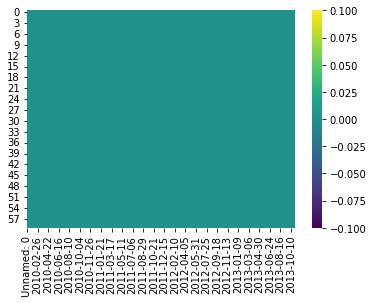

In [6]:
sns.heatmap(stock_data.isnull(), cmap='viridis') 
# No contiene datos nulos en ninguna de sus columnas 

In [ ]:
# Normalizamos los datos
scaler = StandardScaler()
stock_data_normalizado = scaler.fit_transform(stock_data) 

In [ ]:
# Aplicamos método KMeans
k = 14  #definimos la cantidad de clusters
kmeans = KMeans(n_clusters = k, init="random", n_init=10, max_iter=300, random_state=123457) #tomamos los centroides de forma aleatoria y definimos un máximo de 300 iteraciones
kmeans.fit(stock_data_normalizado)  #aplicamos el método a nuestros datos 

print(kmeans.labels_) #dice qué etiqueta le puso a cada cluster
print(kmeans.cluster_centers_ ) #obtener posición de centroides 